# Analyzing the Weather for My Hawaiian Vacation

The purpose of this notebook is to analyze weather patterns in Hawaii, based on 8.5 years of data. The data measures, among other things, temperature and precipitation from January 1st, 2010 to August 23rd, 2017. I will be taking my trip from August 1st, 2018 to August 11th, 2018, and will use previous years' data to make assumptions about the weather during my trip. To accomplish this analysis, I will use SQLAlchemy ORM queries, Pandas, and Matplotlib to query information from an SQLite database, convert to a Pandas Dataframe, and plot the information in various charts. 

In [79]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [80]:
import numpy as np
import pandas as pd

In [81]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [82]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, and_

In [83]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [84]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [85]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [86]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [87]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [88]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [89]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [90]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [91]:
engine.execute('SELECT * FROM Station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [92]:
# Total dates
session.query(func.count(Measurement.date)).all()

[(19550)]

In [93]:
# Earliest Date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [94]:
# Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

<IPython.core.display.Javascript object>


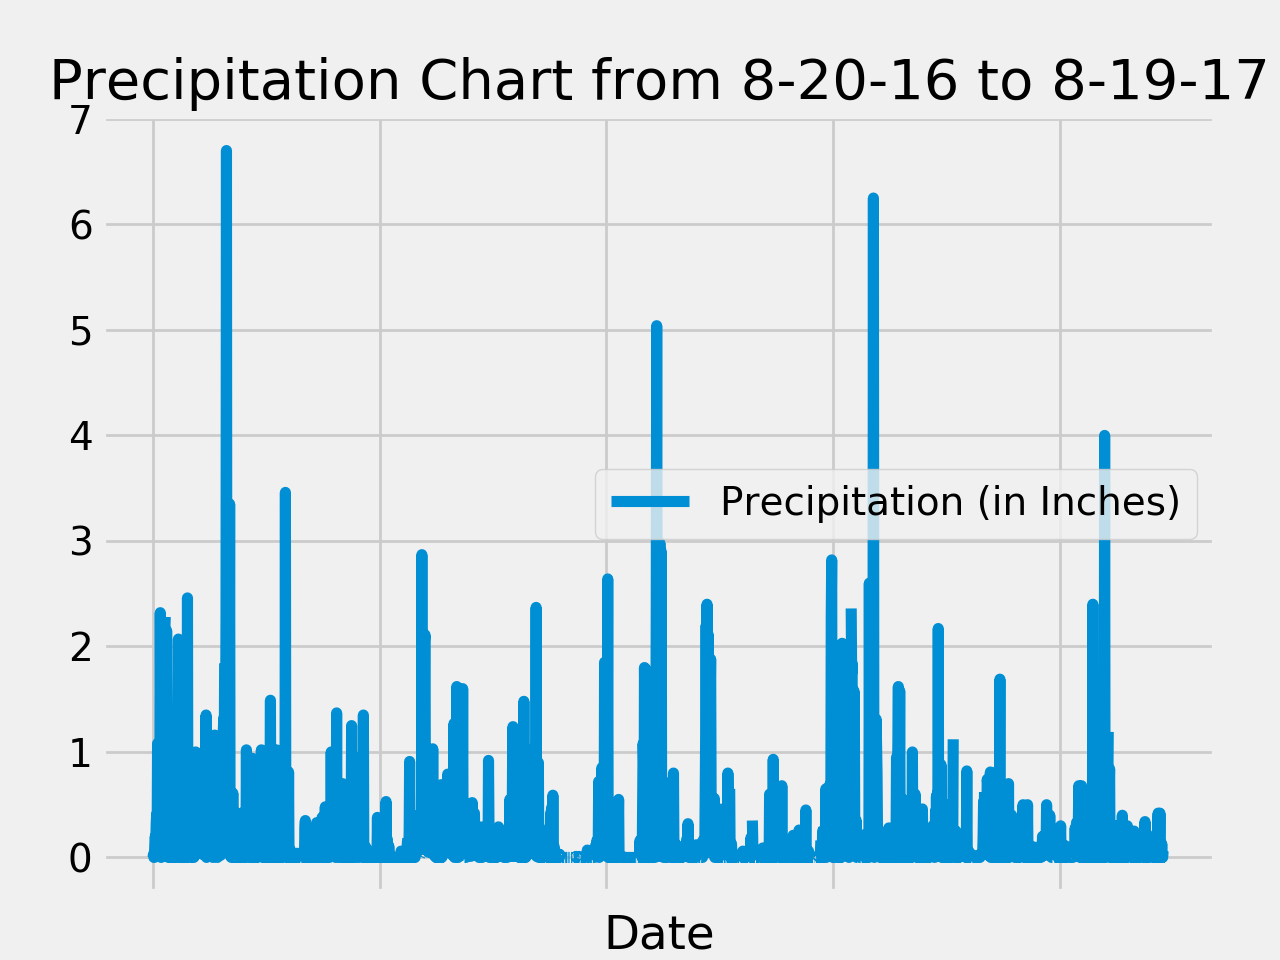

In [95]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from '2017-08-20'
year_today = dt.date(2017,8,20)
year_ago = year_today - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
# use less than 8-20-17 and greater than 8-20-16
# sel = [Measurement.id, 
#        Measurement.station, 
#        Measurement.date, 
#        Measurement.prcp, 
#        Measurement.tobs]
# or use *sel as argument in query

yearly_data = session.query(Measurement.__table__).\
    filter(and_(Measurement.date >= year_ago, Measurement.date < year_today)).\
    order_by(Measurement.date).all()    

# Save the query results as a Pandas DataFrame and set the index to the date column
yearly_df = pd.DataFrame(yearly_data, columns = ['ID','Station #','Date','Precipitation (in Inches)',\
                                                 'Time of Observation Changes (TOBs)'])

yearly_df.set_index('Date', inplace= True)


# Sort the dataframe by date
# already done when querying data (order_by statement)

# Use Pandas Plotting with Matplotlib to plot the data
yearly_df.plot(y='Precipitation (in Inches)', title="Precipitation Chart from 8-20-16 to 8-19-17", legend=True)

# Rotate the xticks for the dates
# to revisit to clean up, switch to plt from pandas plot

In [96]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df = yearly_df.drop(columns = ['ID', 'Time of Observation Changes (TOBs)','Station #'])
prcp_df.describe()

,Precipitation (in Inches)
count,2025.000000
mean,0.179896
std,0.464338
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [97]:
session.query(Station.__table__).all()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3,
  'USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6,
  'USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 (7,
  'USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9),
 (8,
  'USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [98]:
# How many stations are available in this dataset?
locations = session.query(Measurement).group_by(Measurement.station).count()
print(locations)

9


In [99]:
# What are the most active stations?
# List the stations and the counts in descending order.
active = session.query(Measurement.station, func.count(Measurement.station)).\
         group_by(Measurement.station).\
         order_by(func.count(Measurement.station).desc()).all()
active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [100]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

min_max_avg = session.query(func.min(Measurement.tobs),\
                            func.max(Measurement.tobs),\
                            func.avg(Measurement.tobs)).\
                            filter(Measurement.station == 'USC00519281').all()

print(min_max_avg)

[(54.0, 85.0, 71.66378066378067)]


<IPython.core.display.Javascript object>


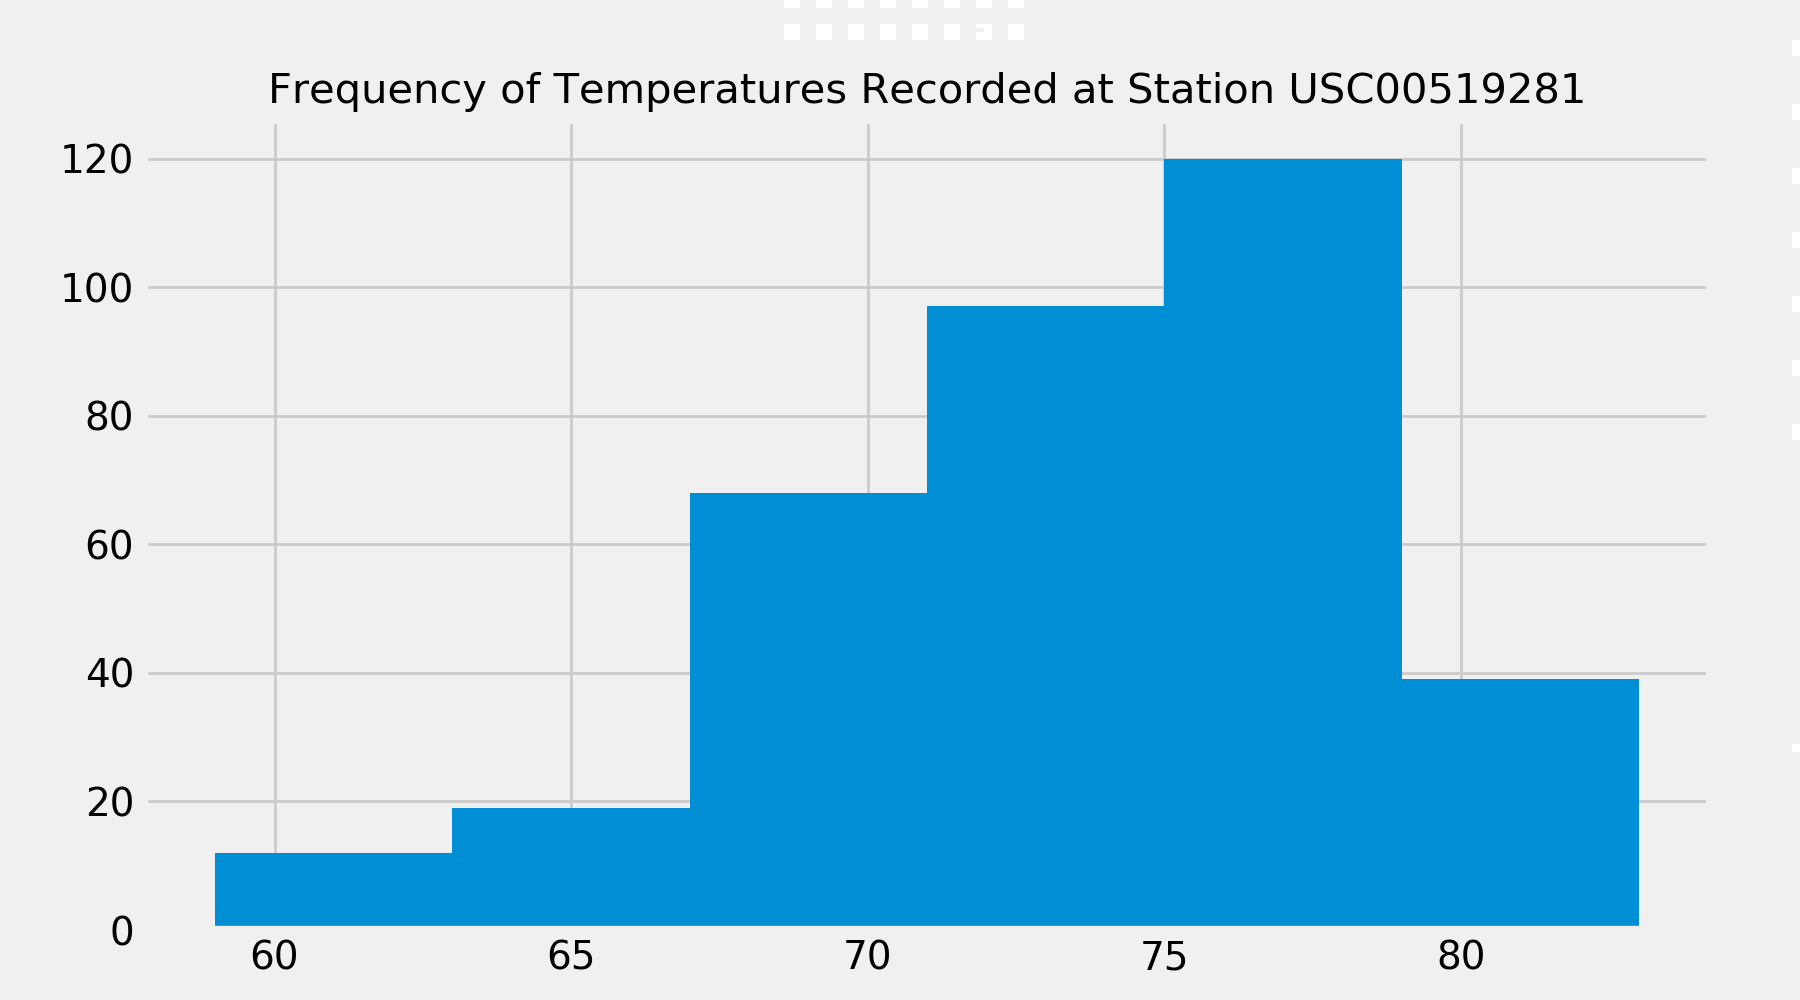

Text(0.5,1,'Frequency of Temperatures Recorded at Station USC00519281')

In [101]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
pop_station = session.query(Measurement.__table__).\
    filter(Measurement.station == 'USC00519281').\
    filter(and_(Measurement.date >= year_ago, Measurement.date < year_today)).all()
    
pop_station_df = pd.DataFrame(pop_station, columns = ['ID','Station #','Date','Precipitation (in Inches)',\
                                                 'Temperature'])

pop_station_df.set_index('Date', inplace= True)
pop_station_df.hist('Temperature', bins=6,figsize=(9,5))
plt.title('Frequency of Temperatures Recorded at Station USC00519281',size=15)
# clean up graph for later

In [102]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [103]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2017-08-01','2017-08-11'))

[(71.0, 78.93023255813954, 83.0)]


/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


<IPython.core.display.Javascript object>


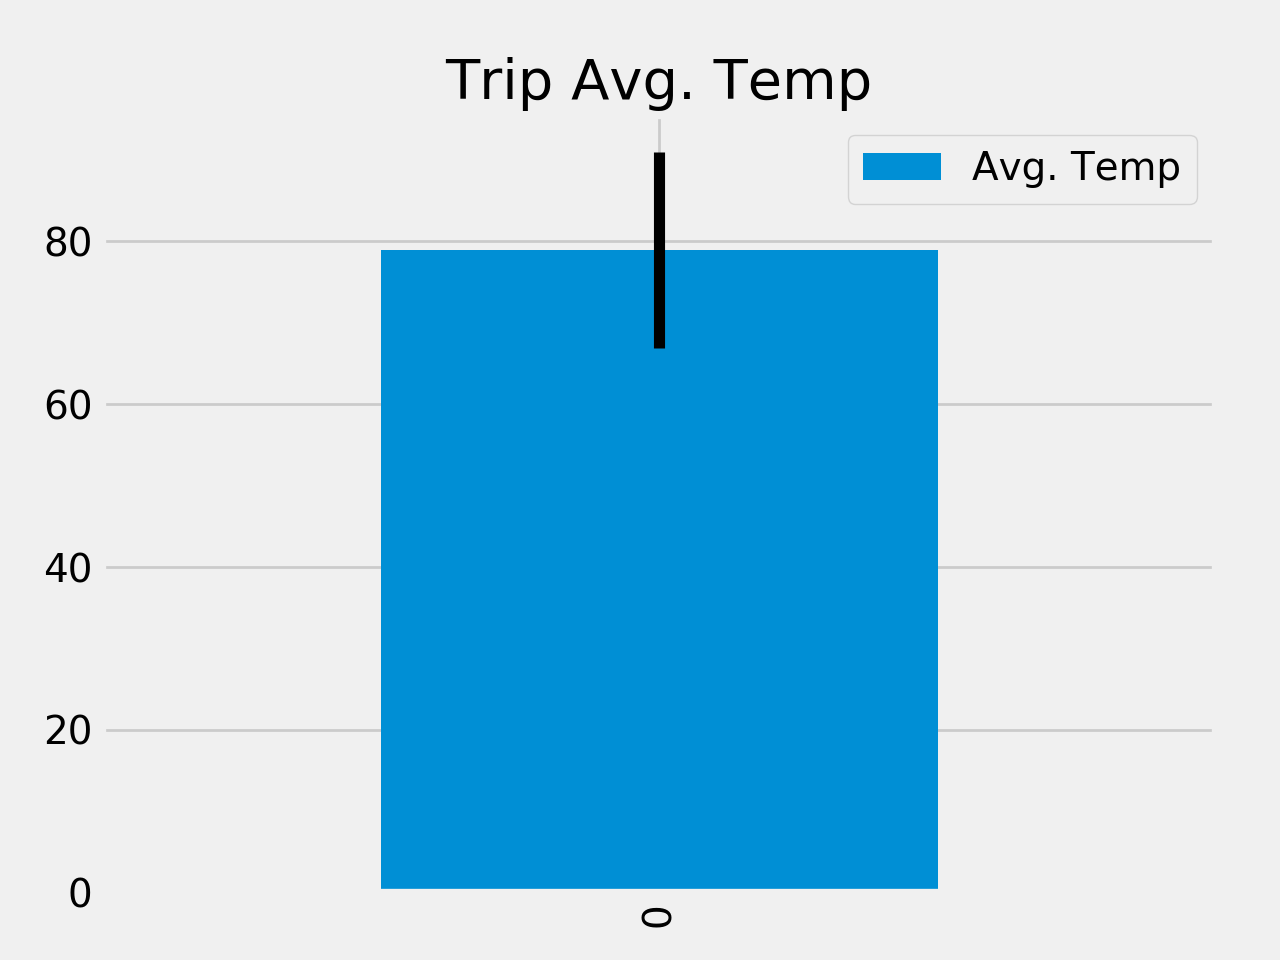

Text(0.5,1,'Trip Avg. Temp')

In [104]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

previous_yr_temps = pd.DataFrame(data=calc_temps('2017-08-01','2017-08-11'),columns=['Min. Temp','Avg. Temp','Max Temp'])
previous_yr_temps.plot(kind='bar',y=['Avg. Temp'],yerr = previous_yr_temps['Max Temp']-previous_yr_temps['Min. Temp'])
plt.title("Trip Avg. Temp")
# to clean up later

In [105]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
# join the two tables, need to revisit, only 5 stations are pulling? any way to check this.

trip_start = '2017-08-01'
trip_end = '2017-08-11'
sel = [Measurement.station, Station.name, Measurement.date,func.sum(Measurement.prcp),\
       Station.latitude, Station.longitude, Station.elevation]

joined_data = session.query(*sel).filter(Measurement.station == Station.station).\
              filter(and_(Measurement.date >= trip_start,Measurement.date < trip_end)).\
              group_by(Measurement.station).all()

# joined_data = session.query(*sel).filter(Measurement.station == Station.station).\
#               filter(and_(Measurement.date >= trip_start, Measurement.date < trip_end)).\
#               group_by(Measurement.station).all()
joined_data


[('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  '2017-08-10',
  0.32,
  21.5213,
  -157.8374,
  7.0),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  '2017-08-10',
  0.9199999999999999,
  21.3331,
  -157.8025,
  152.4),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  '2017-08-06',
  0.06,
  21.45167,
  -157.84888999999998,
  32.9),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  '2017-08-10',
  0.04,
  21.2716,
  -157.8168,
  3.0),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  '2017-08-10',
  0.0,
  21.33556,
  -157.71139,
  19.5)]

## Optional Challenge Assignment

In [106]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [107]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
normals = []

# Set the start and end date of the trip
trip_start_dt = dt.datetime(2017,8,1)
trip_end_dt = dt.datetime(2017,8,11)

# Use the start and end date to create a range of dates
dates_range = [trip_start_dt + dt.timedelta(n) for n in range(int((trip_end_dt - trip_start_dt).days))]

# Strip off the year and save a list of %m-%d strings
dates_range_md = [each.strftime("%m-%d") for each in dates_range]

# Loop through the list of %m-%d strings and calculate the normals for each date
for each in dates_range_md:
    normals.append(daily_normals(each))

flat_list = [item for sublist in normals for item in sublist]
flat_list

[(67.0, 75.54, 83.0),
 (68.0, 75.60377358490567, 84.0),
 (70.0, 76.61111111111111, 85.0),
 (69.0, 76.71153846153847, 84.0),
 (69.0, 76.14814814814815, 82.0),
 (67.0, 76.25, 83.0),
 (71.0, 77.15686274509804, 83.0),
 (68.0, 76.5576923076923, 83.0),
 (69.0, 75.98039215686275, 81.0),
 (65.0, 76.42, 83.0)]

In [108]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(flat_list, columns = ['Avg. Min Temp','Avg. Temp','Avg. Max Temp'],index=dates_range)
normals_df

,Avg. Min Temp,Avg. Temp,Avg. Max Temp
2017-08-01,67.0,75.540000,83.0
2017-08-02,68.0,75.603774,84.0
2017-08-03,70.0,76.611111,85.0
2017-08-04,69.0,76.711538,84.0
2017-08-05,69.0,76.148148,82.0
2017-08-06,67.0,76.250000,83.0
2017-08-07,71.0,77.156863,83.0
2017-08-08,68.0,76.557692,83.0
2017-08-09,69.0,75.980392,81.0
2017-08-10,65.0,76.420000,83.0


<IPython.core.display.Javascript object>


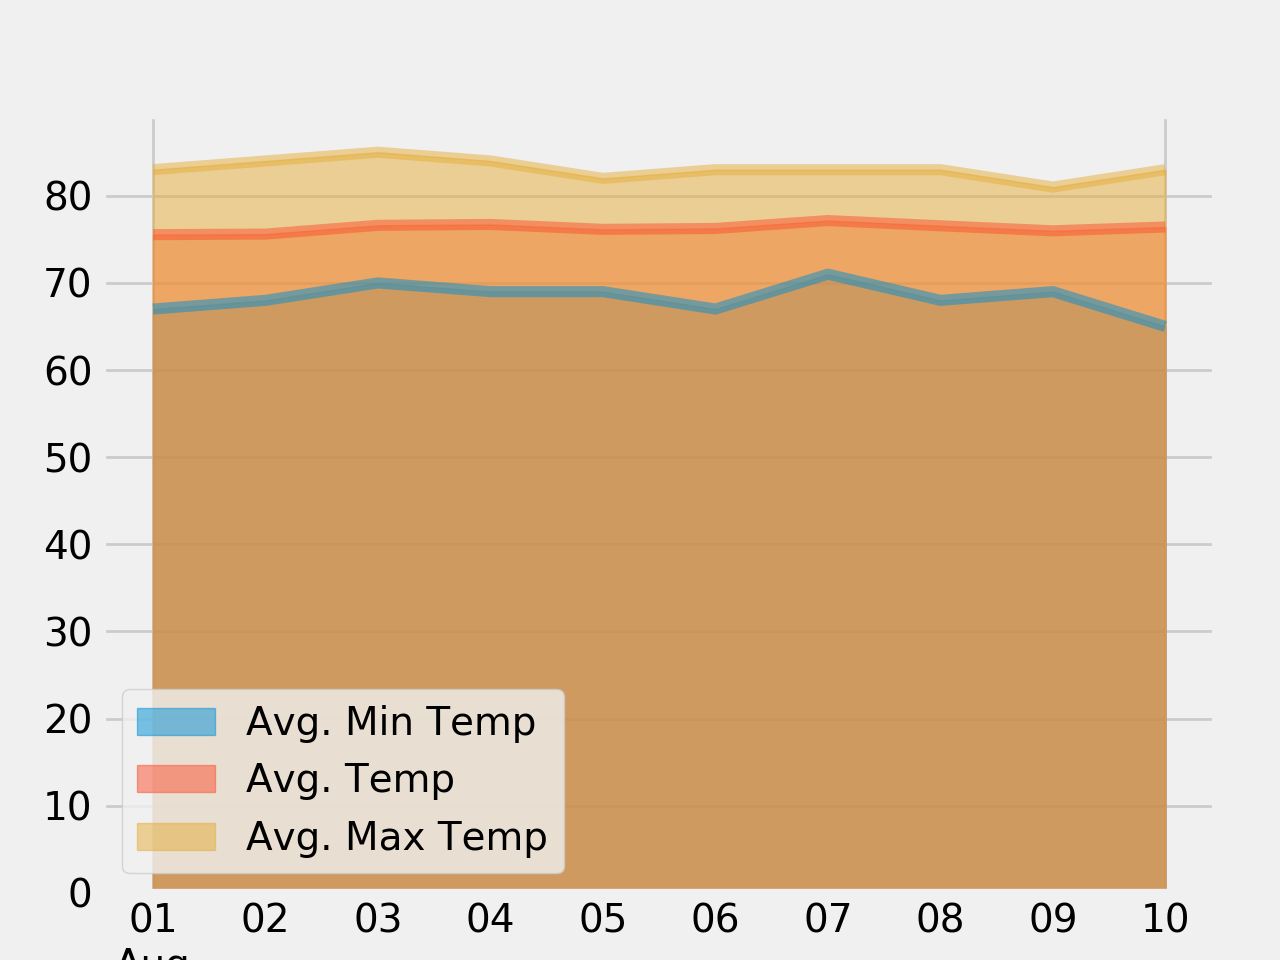

In [109]:
# Plot the daily normals as an area plot with `stacked=False`
normals_df.plot.area(stacked=False)